In [1]:
#Importing necessary libraries

import random as rn
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import  Activation
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
#Defining the path to the data directories
#One path will be for the csv which contains information about the classification and the other is folder with the images

df = pd.read_csv('Galaxy_16classes.csv')
pic_all = "C:/python_lessons/January_Project/images/"

In [3]:
df.head()

,objid,sample,asset_id,gz2_class,category,Target
0,5.880000e+17,original,3,Sc?l,Spiral,S
1,5.880000e+17,original,4,Sc?l,Spiral,S
2,5.880000e+17,original,5,Er,Elliptical,Er
3,5.880000e+17,original,6,Sc1t,Spiral,S1
4,5.880000e+17,original,7,Sc1t,Spiral,S1


In [4]:
df = df.drop(['category'], axis=1)

In [5]:
df.head()

,objid,sample,asset_id,gz2_class,Target
0,5.880000e+17,original,3,Sc?l,S
1,5.880000e+17,original,4,Sc?l,S
2,5.880000e+17,original,5,Er,Er
3,5.880000e+17,original,6,Sc1t,S1
4,5.880000e+17,original,7,Sc1t,S1


In [6]:
df_sample = df.sample(n=20000, replace=False, random_state=1)

In [7]:
df_sample = df_sample[df_sample.Target != 'A']

In [8]:
df_sample['Target'].value_counts()

S      4003
Ei     3947
Er     3662
SB2    1987
Se     1467
SB     1338
S2     1224
Ec      738
S3      498
SB3     291
S1      252
S5      186
S4      140
SB4      84
SB1      66
SB5      63
Name: Target, dtype: int64

In [20]:
#Dropping everything below 1000, in this case, the lowest is S1 (spiral with 1 arm) with 1235 records

#df_sample = df_sample[df_sample.Target != 'SB5']
#df_sample = df_sample[df_sample.Target != 'SB4']
#df_sample = df_sample[df_sample.Target != 'SB1']
#df_sample = df_sample[df_sample.Target != 'S4']
#df_sample = df_sample[df_sample.Target != 'S5']

In [9]:
df_sample['Target'].value_counts()

S      4003
Ei     3947
Er     3662
SB2    1987
Se     1467
SB     1338
S2     1224
Ec      738
S3      498
SB3     291
S1      252
S5      186
S4      140
SB4      84
SB1      66
SB5      63
Name: Target, dtype: int64

In [10]:
#Encoding the Target

df_sample['Target_encoded'] = df_sample['Target']
le = LabelEncoder()
df_sample['Target_encoded'] = le.fit_transform(df_sample['Target_encoded'])

In [11]:
df_sample.head()

,objid,sample,asset_id,gz2_class,Target,Target_encoded
201076,5.880000e+17,original,219288,Ei,Ei,1
244334,5.880000e+17,extra,265845,Er,Er,2
196847,5.880000e+17,original,214930,Sc2t,S2,5
168257,5.880000e+17,original,181898,SBb2m,SB2,11
236083,5.880000e+17,extra,256678,Sc?t,S,3


In [12]:
df_sample['Target_encoded'].value_counts()

3     4003
1     3947
2     3662
11    1987
15    1467
9     1338
5     1224
0      738
6      498
12     291
4      252
8      186
7      140
13      84
10      66
14      63
Name: Target_encoded, dtype: int64

In [13]:
#Creating new frames for each class to undersample

df_SB4 = df_sample[df_sample.Target_encoded == 13]
df_SB5 = df_sample[df_sample.Target_encoded == 14]

df_S4 = df_sample[df_sample.Target_encoded == 7]
df_S5 = df_sample[df_sample.Target_encoded == 8]
df_SB1 = df_sample[df_sample.Target_encoded==10]

df_S1 = df_sample[df_sample.Target_encoded == 4]
df_SB3 = df_sample[df_sample.Target_encoded == 12]
df_S3 = df_sample[df_sample.Target_encoded==6]

df_Ec = df_sample[df_sample.Target_encoded == 0]
df_S2 = df_sample[df_sample.Target_encoded == 5]
df_SB = df_sample[df_sample.Target_encoded== 9]

df_Se = df_sample[df_sample.Target_encoded == 15]
df_SB2 = df_sample[df_sample.Target_encoded == 11]
df_Er = df_sample[df_sample.Target_encoded==2]

df_Ei = df_sample[df_sample.Target_encoded == 1]
df_S = df_sample[df_sample.Target_encoded == 3]


In [14]:
#Undersampling the data to Spiral with 1 arm category S1

SB4_sampled = df_SB4.sample(n=len(df_SB5), random_state=101)
S4_sampled = df_S4.sample(n=len(df_SB5), random_state=101)
S5_sampled = df_S5.sample(n=len(df_SB5), random_state=101)
SB1_sampled = df_SB1.sample(n=len(df_SB5), random_state=101)
S1_sampled = df_S1.sample(n=len(df_SB5), random_state=101)

SB3_sampled = df_SB3.sample(n=len(df_SB5), random_state=101)
S3_sampled = df_S3.sample(n=len(df_SB5), random_state=101)
Ec_sampled = df_Ec.sample(n=len(df_SB5), random_state=101)
S2_sampled = df_S2.sample(n=len(df_SB5), random_state=101)
SB_sampled = df_SB.sample(n=len(df_SB5), random_state=101)
Se_sampled = df_Se.sample(n=len(df_SB5), random_state=101)
SB2_sampled = df_SB2.sample(n=len(df_SB5), random_state=101)
Er_sampled = df_Er.sample(n=len(df_SB5), random_state=101)
Ei_sampled = df_Ei.sample(n=len(df_SB5), random_state=101)
S_sampled = df_S.sample(n=len(df_SB5), random_state=101)
df_balanced = pd.concat([SB4_sampled, S4_sampled, S5_sampled, SB1_sampled, S1_sampled, SB3_sampled,S3_sampled, Ec_sampled, S2_sampled, SB_sampled, Se_sampled, SB2_sampled, Er_sampled, Ei_sampled, S_sampled, df_SB5],axis=0)

In [15]:
#Shuffling the data and resetting the index

df_processed = df_balanced.sample(frac=1).reset_index(drop=True)

df_processed

,objid,sample,asset_id,gz2_class,Target,Target_encoded
0,5.880000e+17,original,141671,SBc,SB,9
1,5.880000e+17,original,71693,SBc?m,SB,9
2,5.880000e+17,original,94793,Ei,Ei,1
3,5.880000e+17,original,157328,Sb1t(r),S1,4
4,5.880000e+17,original,113469,Ei,Ei,1
...,...,...,...,...,...,...
1003,5.880000e+17,original,120543,Sc3t,S3,6
1004,5.880000e+17,original,201644,Sc3m,S3,6
1005,5.880000e+17,original,118110,SBb4t(r),SB4,13
1006,5.880000e+17,original,26221,Ser,Se,15


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


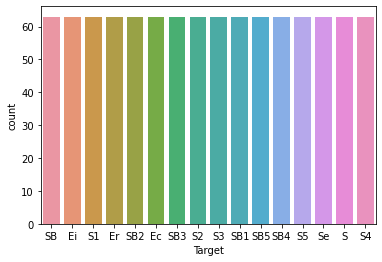

In [16]:
sns.countplot(df_processed['Target']);

In [17]:
#Splitting the data into training and testing sets in the dataframe

training_data = df_processed.sample(frac=0.8, random_state=25)

testing_data = df_processed.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 806
No. of testing examples: 202


In [18]:
#Resetting the index, otherwise the matching with the image won't work

training_data = training_data.reset_index(drop=True)
testing_data = testing_data.reset_index(drop=True)

In [19]:
training_data.head()

,objid,sample,asset_id,gz2_class,Target,Target_encoded
0,5.880000e+17,original,228007,Sc+m,S5,8
1,5.880000e+17,extra,261379,Ec,Ec,0
2,5.880000e+17,original,130310,SBb4m,SB4,13
3,5.880000e+17,original,226825,Er,Er,2
4,5.880000e+17,original,66895,Er,Er,2


In [20]:
#Adding the jpg to the end of the id

training_data['asset_id'] = training_data['asset_id'].astype(str)
testing_data['asset_id'] = testing_data['asset_id'].astype(str)

def append_ext(fn):
    return fn+".jpg"

training_data["asset_id"]=training_data["asset_id"].apply(append_ext)
testing_data["asset_id"]=testing_data["asset_id"].apply(append_ext)

In [22]:
#Using image data generator module to match the labels in the dataframe with the images in another folder

import keras_preprocessing

from keras_preprocessing.image import ImageDataGenerator

_datagen = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.25,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True
            )

#Training generator

train_generator=_datagen.flow_from_dataframe(
    dataframe=training_data,
    directory= pic_all,
    has_ext=False,
    x_col="asset_id",
    y_col="Target",
    subset="training",
    batch_size=10,
    seed=42,
    shuffle=True,
    validate_filenames=True,
    class_mode="categorical",
    target_size=(424,424))

#Validation generator

valid_generator = _datagen.flow_from_dataframe(
    dataframe = training_data, 
    directory = pic_all,
    has_ext = False,
    x_col = "asset_id", 
    y_col = "Target",
    seed=42,
    shuffle=True,
    class_mode = "categorical", 
    target_size = (424, 424), 
    batch_size = 10,
    subset = 'validation')

#Testing generator

_test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=_test_datagen.flow_from_dataframe(
    dataframe=testing_data,
    directory=pic_all,
    x_col="asset_id",
    y_col="Target",
    has_ext=False,
    batch_size=1,
    seed=42,
    shuffle=False,
    validate_filenames=True,
    class_mode="categorical",
    target_size=(424,424))

Found 536 validated image filenames belonging to 16 classes.
Found 178 validated image filenames belonging to 16 classes.
Found 182 validated image filenames belonging to 16 classes.


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 92 invalid image filename(s) in x_col="asset_id". These filename(s) will be ignored.
  warnings.warn(
C:\Users\HelenLuhaar\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 92 invalid image filename(s) in x_col="asset_id". These filename(s) will be ignored.
  warnings.warn(
C:\Users\HelenLuhaar\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 20 invalid image filename(s) in x_col="asset_id". These filename(s) will be ignored.
  warnings.warn(


In [24]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import RMSprop

In [25]:
#Training the model

model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=(424,424,3)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
len(model.layers)

14

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 424, 424, 32)      896       
                                                                 
 activation (Activation)     (None, 424, 424, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 422, 422, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 422, 422, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 211, 211, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 211, 211, 64)      18496     
                                                        

In [29]:
#Step sizes, fitting and training the model

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_5392\993933976.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/10
53/53 [==============================] - 331s 6s/step - loss: 2.8577 - accuracy: 0.0399 - val_loss: 2.7731 - val_accuracy: 0.0647
Epoch 2/10
53/53 [==============================] - 331s 6s/step - loss: 2.7727 - accuracy: 0.0513 - val_loss: 2.7737 - val_accuracy: 0.0588
Epoch 3/10
53/53 [==============================] - 326s 6s/step - loss: 2.7724 - accuracy: 0.0532 - val_loss: 2.7742 - val_accuracy: 0.0412
Epoch 4/10
53/53 [==============================] - 325s 6s/step - loss: 2.7719 - accuracy: 0.0494 - val_loss: 2.7747 - val_accuracy: 0.0588
Epoch 5/10
53/53 [==============================] - 324s 6s/step - loss: 2.7718 - accuracy: 0.0570 - val_loss: 2.7747 - val_accuracy: 0.0706
Epoch 6/10
53/53 [==============================] - 323s 6s/step - loss: 2.7717 - accuracy: 0.0513 - val_loss: 2.7763 - val_accuracy: 0.0706
Epoch 7/10
53/53 [==============================] - 321s 6s/step - loss: 2.7713 - accuracy: 0.0608 - val_loss: 2.7761 - val_accuracy: 0.0706
Epoch 8/10
53

In [61]:
#Fitting the model


#history_cnn = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=10)

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_15664\12513741.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=10)


Epoch 1/10
10/10 [==============================] - 372s 37s/step - loss: 174.8988 - accuracy: 0.0592
Epoch 2/10
10/10 [==============================] - 347s 35s/step - loss: 2.7882 - accuracy: 0.0662
Epoch 3/10
10/10 [==============================] - 343s 34s/step - loss: 2.7727 - accuracy: 0.0761
Epoch 4/10
10/10 [==============================] - 310s 31s/step - loss: 2.7654 - accuracy: 0.1085
Epoch 5/10
10/10 [==============================] - 310s 31s/step - loss: 3.4161 - accuracy: 0.1507
Epoch 6/10
10/10 [==============================] - 309s 31s/step - loss: 2.7235 - accuracy: 0.2028
Epoch 7/10
10/10 [==============================] - 321s 32s/step - loss: 2.6683 - accuracy: 0.2521
Epoch 8/10
10/10 [==============================] - 324s 32s/step - loss: 2.6522 - accuracy: 0.3000
Epoch 9/10
10/10 [==============================] - 332s 33s/step - loss: 2.0470 - accuracy: 0.5127
Epoch 10/10
10/10 [==============================] - 323s 32s/step - loss: 3.0184 - accuracy: 0.53

In [31]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_5392\2987361598.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


182/182 [==============================] - 34s 184ms/step


In [32]:
score = model.evaluate_generator(train_generator)
print('loss:', score[0])
print('accuracy:', score[1])

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_5392\1099212622.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(train_generator)


loss: 2.7697391510009766
accuracy: 0.06902985274791718


In [33]:
predicted_class_indices=np.argmax(pred,axis=1)

In [34]:
predicted_class_indices

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], dtype=int64)

In [35]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [36]:
true_values = [labels[k] for k in test_generator.classes]

In [37]:
# Calculate and print the metrics results
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report

cm = confusion_matrix(true_values, predictions)
print('Confusion matrix:')
print(cm)
print('')

k = cohen_kappa_score(true_values, predictions, weights = 'quadratic')
print("Quadratic weighted Cohen's kappa = {:.4f}".format(k))
print('')

cr = classification_report(true_values, predictions)
print('Classification report:')
print(cr)
print('')

Confusion matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]]

Quadratic weighted Cohen's kappa = 0.0000

Classification report:
              precision    recall  f1-score   support

          Ec       0.00      0.00      0.00

C:\Users\HelenLuhaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HelenLuhaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HelenLuhaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
